## Jelena CAP394


### The objectives of my study

Various paleoclimate studies confirmed that **Last Millennium** _(850 C.E -1850 C.E)_ is a period with important events and significant climate fluctuations such as the **Medieval Climate Anomaly(MCA)** and the **Little Ice Age(LIA)**.
Emerging scientific literature continues to report more evidence for the occurrence of both the **MCA** and **LIA** in South America.  
Therefore, it is crucial to examine climatic variability beyond the era of instrumental records through paleoclimate studies using **proxies** and modeling. 
Although, paleoclimate proxies may provide scarce, fragmented and local scale information, which limit the interpretation of past vegetational changes, they are unique evidences of past time and making **multiproxy compilation** could give us valuable insights. 
So my main task here is to look into several **speleothem** records from the South American and try to find signals or patterns
they have in common. 


### The Data

I have a set of 10 speleothem records all **CSV file format**. Each sheet corresponds to a cave in South America.
They are different in time span as well as in temporal resolution. 

You can find data [here](https://github.com/maxjel/Proxies/blob/master/botuvera.csv) and [here](https://github.com/maxjel/Proxies/blob/master/quelcaya.csv)

### Basic Data Analysis 

Let's take a look at Botuvera cave and Quelcaya cave data set. 

In [1]:
import pandas as pd
import pandas_datareader as pdr
pd.set_option('max_rows', 10)

In [2]:
df1 = 'botuvera.csv'
d1 = pd.read_csv(df1,index_col=0,parse_dates=[0])

In [3]:
df2 = 'quelcaya.csv'
d2 = pd.read_csv(df2,index_col=0,parse_dates=[0])

In [4]:
d1.sample(5)


,d18O1
age1,
-4156.4,47.4
-428.5,41.8
-3903.4,51.0
-43.1,39.7
-4284.1,47.9


In [5]:
d2.sample(5)

,d18O1
age1,
1237,-17.24
623,-17.97
592,-18.27
1335,-18.21
382,-16.92


### Ploting data 

In [6]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
import numpy as np

(300, 2000)

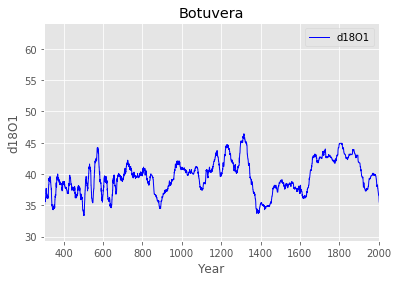

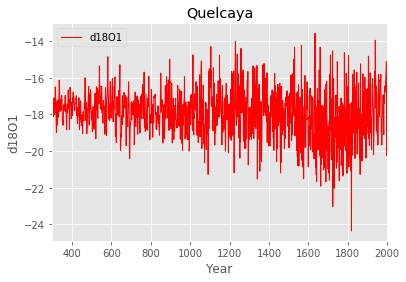

In [7]:
plot = d1.plot(title='Botuvera', lw=1, color='blue', marker='', markersize=3)
plot.set_xlabel("Year")
plot.set_ylabel("d18O1")
ax=plt.gca()
ax.set_xlim ([300,2000])

plot = d2.plot(title='Quelcaya', lw=1, color='red', marker='', markersize=3)
plot.set_xlabel("Year")
plot.set_ylabel("d18O1")
ax=plt.gca()
ax.set_xlim ([300,2000])


### Panda 30yr rolling method

In [68]:
d1avg=pd.DataFrame(d1)
d2avg=pd.DataFrame(d2)

calculating mean

In [113]:
d1avg ['MA_10'] = d1avg.d18O1.rolling(10).mean()
d2avg ['MA_30'] = d2avg.d18O1.rolling(30).mean()

ploting new variable 

In [114]:
d1.mean=pd.DataFrame(d1avg.MA_10)
d2.mean=pd.DataFrame(d2avg.MA_30)

In [115]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
import numpy as np

(300, 2000)

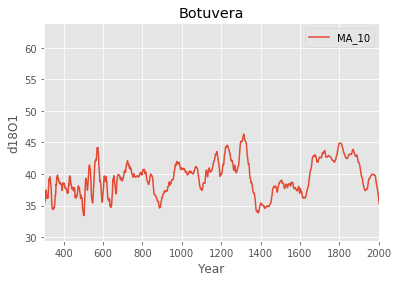

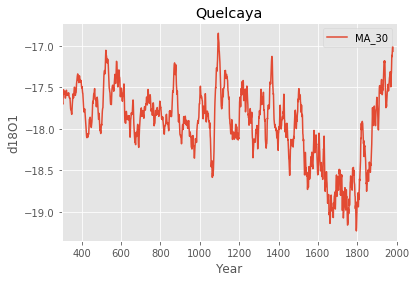

In [116]:
plot = d1.mean.plot(title='Botuvera')
plot.grid(True)
plot.set_xlabel("Year")
plot.set_ylabel("d18O1")

ax=plt.gca()
ax.set_xlim ([300,2000])

plot = d2.mean.plot(title='Quelcaya')
plot.grid(True)
plot.set_xlabel("Year")
plot.set_ylabel("d18O1")
ax=plt.gca()
ax.set_xlim ([300,2000])



### Wavelet 

Following [paper](https://journals.ametsoc.org/doi/pdf/10.1175/1520-0477%281998%29079%3C0061%3AAPGTWA%3E2.0.CO%3B2)

In [69]:
data1=d1avg

In [70]:
data1.sample(5)

,d18O1,MA_10
age1,,
-1612.7,41.4,41.65
-3871.7,46.2,46.60
-630.5,37.8,38.16
-3336.8,46.3,46.11
-2710.8,44.1,44.24


In [71]:
N = data1.size; print(N)

99576


In [91]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt



In [92]:
def mapping(data1,feature):
    featureMap=dict()
    count=0
    for i in sorted(data1[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data1[feature].map(featureMap)
    return data1

In [93]:
data1=mapping(data1,"d18O1")

In [94]:
data1f=((data1-data1.min())/(data1.max()-data1.min()))

In [95]:
data1f.sample(5)

,d18O1,MA_10
age1,,
-135.3,0.367089,0.369059
-303.7,0.221519,0.218501
-94.5,0.341772,0.344498
-154.9,0.329114,0.326954
-6558.7,0.594937,0.606699


(300, 2000)

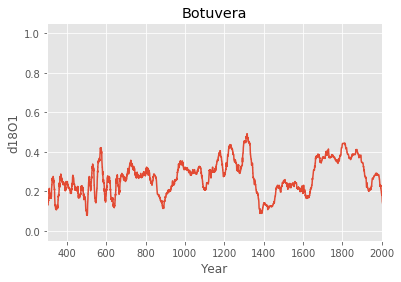

In [96]:
plot = data1f.d18O1.plot(title='Botuvera')
plot.grid(True)
plot.set_xlabel("Year")
plot.set_ylabel("d18O1")

ax=plt.gca()
ax.set_xlim ([300,2000])


In [117]:
data2=d2avg

In [118]:
def mapping(data2,feature):
    featureMap=dict()
    count=0
    for i in sorted(data2[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data2[feature].map(featureMap)
    return data2

In [119]:
data2=mapping(data2,"d18O1")

In [120]:
data2f=((data2-data2.min())/(data2.max()-data2.min()))

In [121]:
data2f.sample(5)

,d18O1,MA_10,MA_30
age1,,,
1031,0.721707,0.548234,0.577638
1842,0.497217,0.498222,0.354018
1058,0.518553,0.520028,0.324109
1781,0.482375,0.329699,0.282180
1592,0.646568,0.454136,0.436198


(300, 2000)

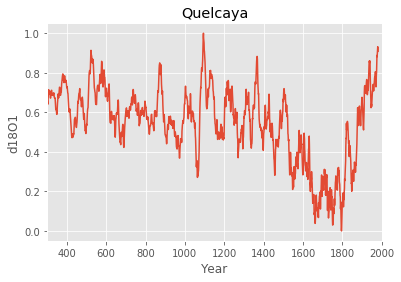

In [122]:
plot = data2f.MA_30.plot(title='Quelcaya')
plot.grid(True)
plot.set_xlabel("Year")
plot.set_ylabel("d18O1")

ax=plt.gca()
ax.set_xlim ([300,2000])


(300, 2000)

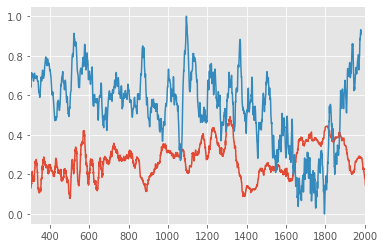

In [123]:
plt.plot(data1f.d18O1)
plt.plot(data2f.MA_30)
plt.xlim(300,2000)

